In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


# Heart Disease UCI Prediction

## 1. Importing Necessary Libraries

In [3]:
# utilities
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option("max_columns", 100)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler



# time
import time

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Loading the Dataset

In [4]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

## 3. Exploratory Data Analysis

In [5]:
df.shape

(303, 14)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**As we see, there aren't any null data.**

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [11]:
abs(df.corr()["target"]).sort_values(ascending = False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

In [12]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

**The data is balanced. There is no problem.**

### Let's see the value counts of all features

In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

**We need to convert this to categorical variable.**

In [14]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

**We need to convert this to categorical variable.**

In [15]:
df.trestbps.value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, dtype: int64

In [16]:
df.chol.value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [17]:
df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

**We need to convert this to categorical variable.**

In [18]:
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

**We need to convert this to categorical variable.**

In [19]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [20]:
df.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

**We need to convert this to categorical variable.**

In [21]:
df.oldpeak.value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [22]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

**We need to convert this to categorical variable.**

In [23]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [24]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

**We need to convert this to categorical variable.**

## 4. Data Visualization

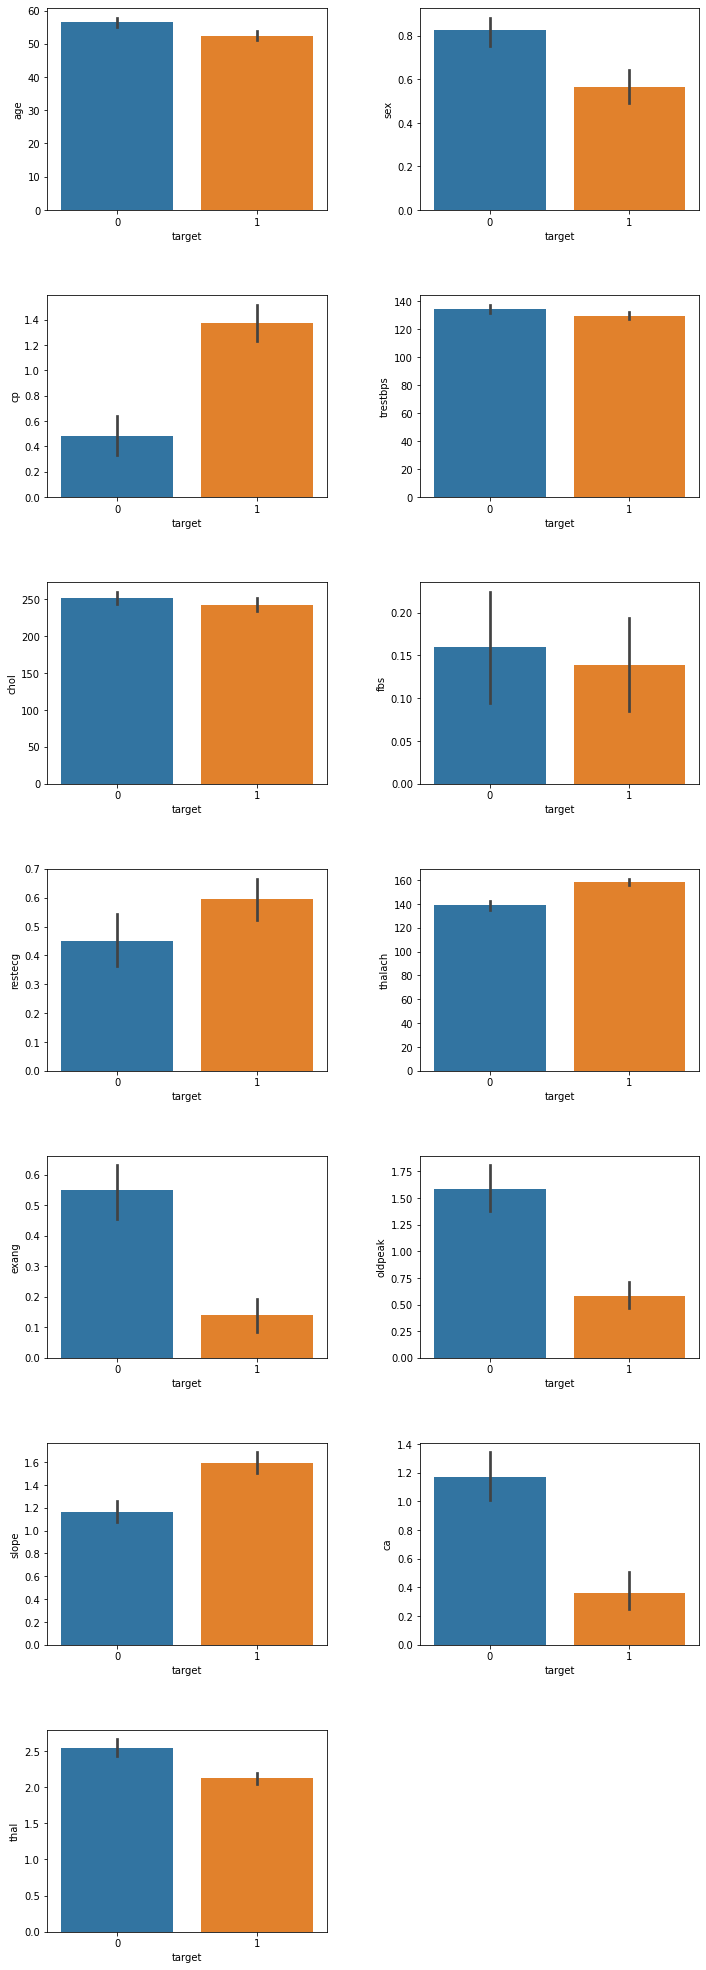

In [25]:
ctr = 1
figure = plt.figure(figsize = (11,64))
for i in df.columns:
    if (i == "target"):
        continue
    plt.subplot(16,2,ctr)
    figure.tight_layout(pad = 5.0)
    ctr += 1
    sns.barplot(x = "target", y = i, data = df)

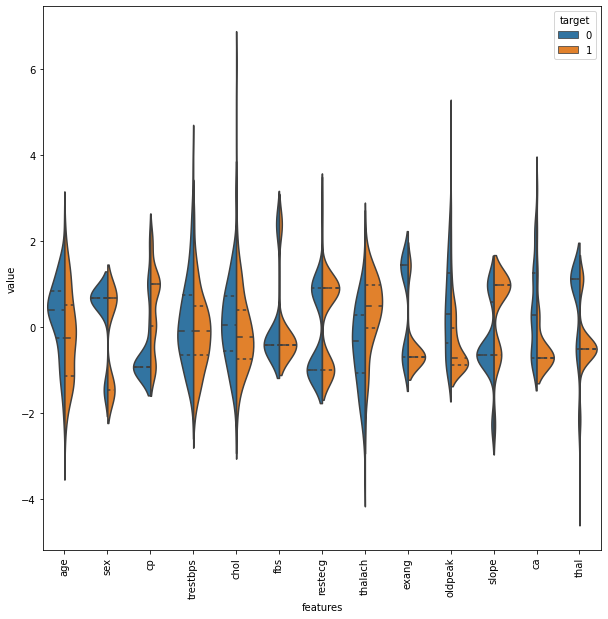

In [26]:
data_y = df["target"]
data_x = df.drop(["target"], axis = 1)

data_n_2 = (data_x - data_x.mean()) / (data_x.std()) # standardization

data_x = pd.concat([data_y, data_n_2.iloc[:,0:13]], axis = 1)
data_x = pd.melt(data_x, id_vars = "target", var_name = "features", value_name = "value")

plt.figure(figsize = (10,10))
sns.violinplot(x = "features", y = "value", hue = "target", data = data_x, split = True, inner = "quart")
plt.xticks(rotation = 90);

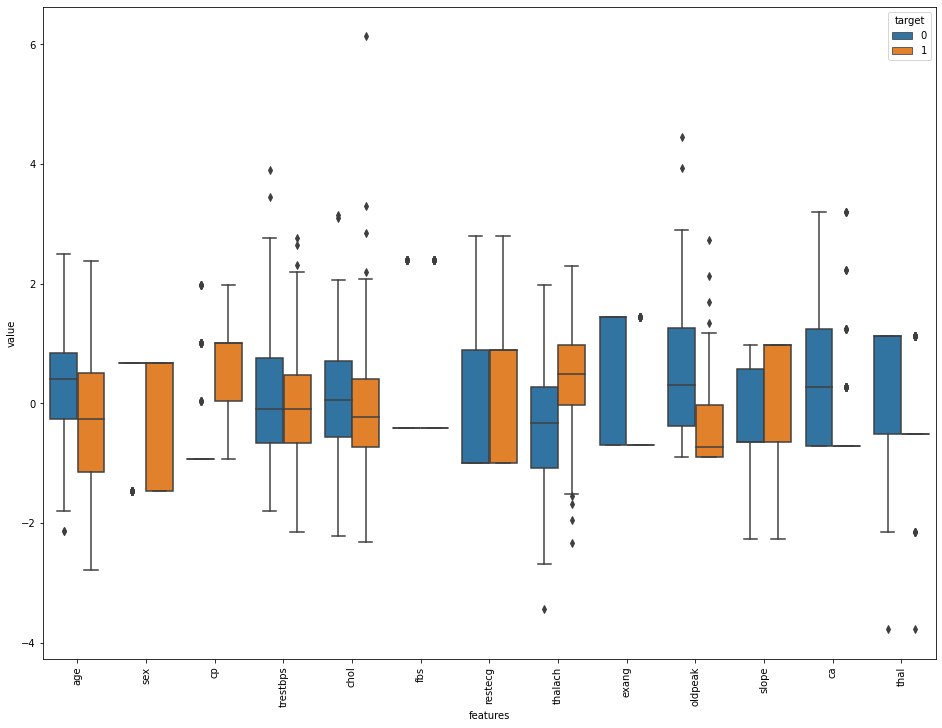

In [27]:
data_x = pd.concat([data_y, data_n_2.iloc[:,0:13]], axis = 1)
data_x = pd.melt(data_x, id_vars = "target", var_name = "features", value_name = "value")

plt.figure(figsize = (16,12))
sns.boxplot(x = "features", y = "value", hue = "target", data = data_x)
plt.xticks(rotation = 90);

### Now we use swarm plot to see the difference better.

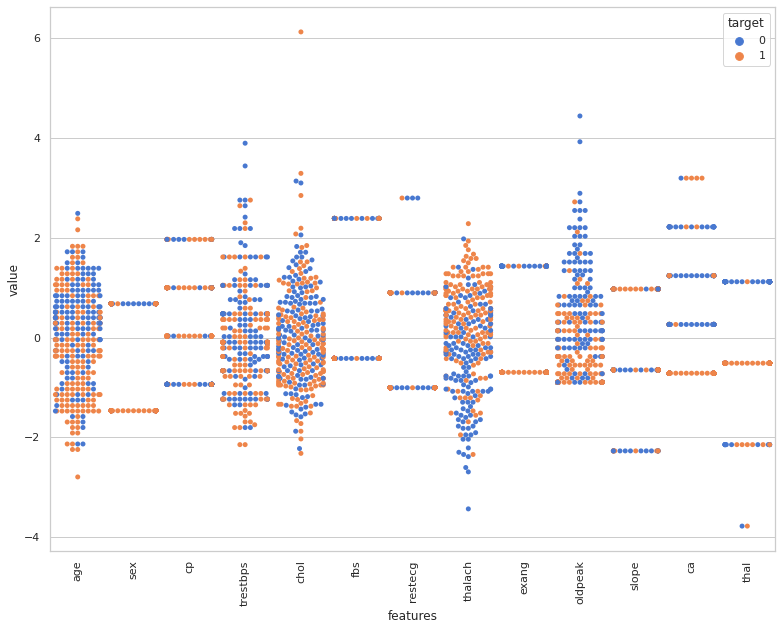

In [28]:
sns.set(style = "whitegrid", palette = "muted")

data_x = pd.concat([data_y, data_n_2.iloc[:,0:13]], axis = 1)
data_x = pd.melt(data_x, id_vars = "target", var_name = "features", value_name = "value")

plt.figure(figsize = (13,10))
tic = time.time()
sns.swarmplot(x = "features", y = "value", hue = "target", data = data_x)
plt.xticks(rotation = 90);

### Let's visualize heart disease according to ages

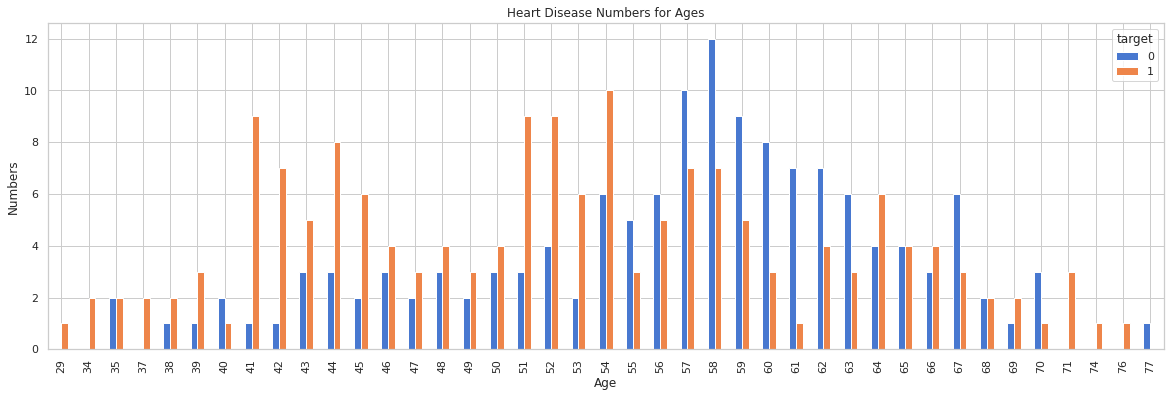

In [29]:
pd.crosstab(df.age, df.target).plot(kind = "bar", figsize = (20, 6))
plt.title('Heart Disease Number for Ages')
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

### Let's visualize heart disease according to sex

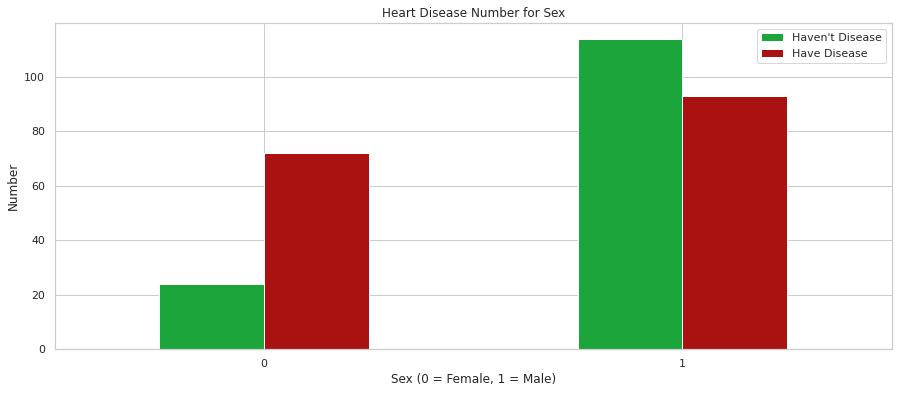

In [35]:
pd.crosstab(df.sex, df.target).plot(kind = "bar", figsize = (15, 6), color = ['#1CA53B', '#AA1111'])
plt.title('Heart Disease Number for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Number')
plt.show()

### Let's visualize Maximum Heart Rate according to age

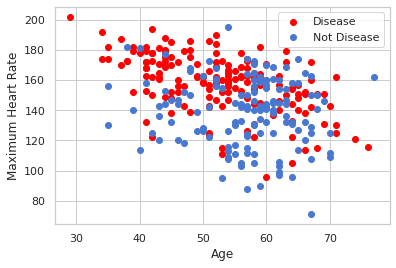

In [32]:
plt.scatter(x = df.age[df.target == 1], y = df.thalach[(df.target == 1)], c = "red")
plt.scatter(x = df.age[df.target == 0], y = df.thalach[(df.target == 0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

### Heart Disease Number for Slope

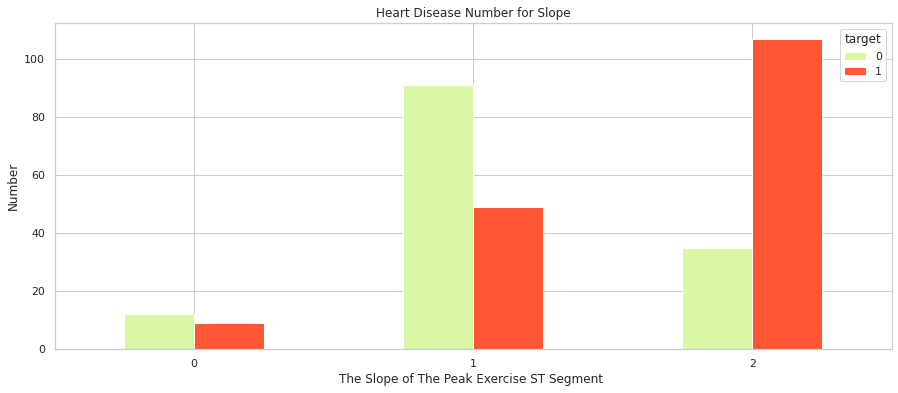

In [33]:
pd.crosstab(df.slope, df.target).plot(kind = "bar", figsize = (15, 6), color = ['#DAF7A6','#FF5733'])
plt.title('Heart Disease Number for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Number')
plt.show()

### Heart Disease Number According to FBS

In [ ]:
pd.crosstab(df.fbs, df.target).plot(kind = "bar", figsize = (15, 6),color = ['#FFC300','#581845'])
plt.title('Heart Disease Number According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Number of Disease or Not')
plt.show()

### Heart Disease Number According to Chest Pain Type

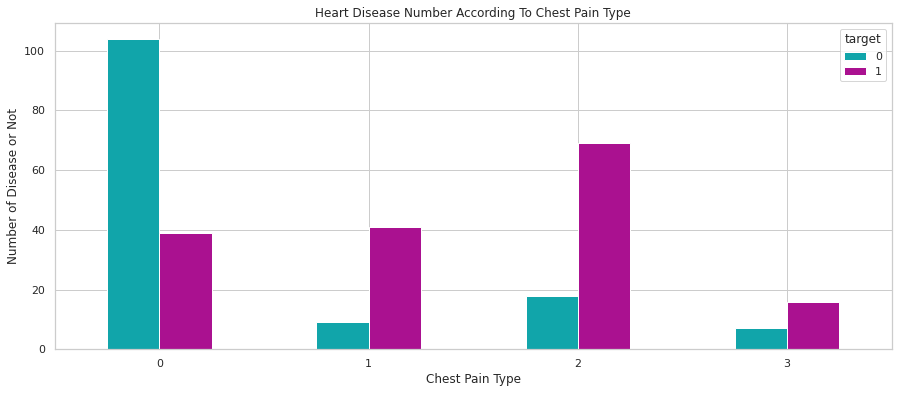

In [36]:
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize = (15, 6),color = ['#11A5AA','#AA1190'])
plt.title('Heart Disease Number According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Number of Disease or Not')
plt.show()

### All correlation between features

<AxesSubplot:>

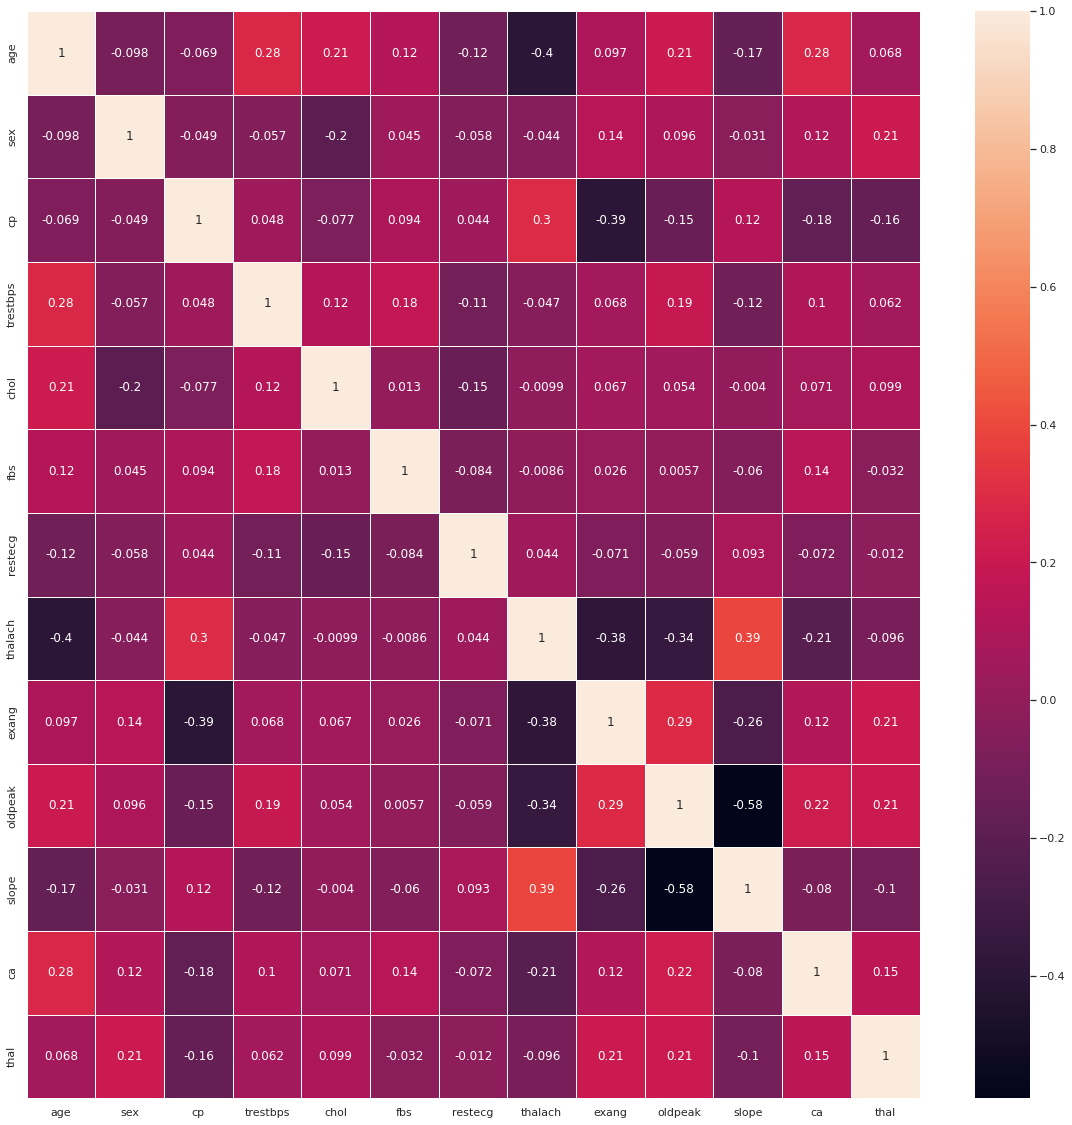

In [103]:
temp = df.drop("target", axis = 1)
plt.figure(figsize = (20,20))
sns.heatmap(temp.corr(), annot = True, linewidths = 0.5)

## 5. Feature Engineering

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

- **age:** The person's age in years
- **sex:** The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

#### We need to convert some features to categorical variable

In [104]:
df['sex'] = df['sex'].replace({0: "female"})
df['sex'] = df['sex'].replace({1: "male"})

df['cp'] = df['cp'].replace({0: "typical angina"})
df['cp'] = df['cp'].replace({1: "atypical angina"})
df['cp'] = df['cp'].replace({2: "non-anginal pain"})
df['cp'] = df['cp'].replace({3: "asymptomatic"})

df['fbs'] = df['fbs'].replace({0: "lower than 120mg/ml"}) 
df['fbs'] = df['fbs'].replace({1: "greater than 120mg/ml"}) 

df['restecg'] = df['restecg'].replace({0: "normal"})
df['restecg'] = df['restecg'].replace({1: "ST-T wave abnormality"})
df['restecg'] = df['restecg'].replace({2: "left ventricular hypertrophy"})

df['exang'] = df['exang'].replace({0: "no"})
df['exang'] = df['exang'].replace({1: "yes"})

df['slope'] = df['slope'].replace({0: "upsloping"})
df['slope'] = df['slope'].replace({1: "flat"})
df['slope'] = df['slope'].replace({2: "downsloping"})

df['thal'] = df['thal'].replace({1: "normal"})
df['thal'] = df['thal'].replace({2: "fixed defect"})
df['thal'] = df['thal'].replace({3: "reversable defect"})

df = df[df['thal'] != 0]

#### Let's check the data types

In [105]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

#### We should create dummy variables, because computers does not understand the strings, they need numbers.

In [106]:
df = pd.get_dummies(df, drop_first = True)

In [146]:
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,fbs_lower than 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,0,0,0,1,0,0,1,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,0,0,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,0,0,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,0,0,0,0


### We determine x and y columns

In [107]:
y = df["target"]
x = df.drop("target", axis = 1)

## 6. Modeling and Predicting

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

#### Here we are trying MultinomialNB, KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, XGBClassifier.

### Multinomial Naive Bayes Classifier

In [109]:
MNB = MultinomialNB()
MNB.fit(x_train, y_train)
pred_MNB = MNB.predict(x_test)

In [110]:
print(classification_report(pred_MNB, y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



<AxesSubplot:>

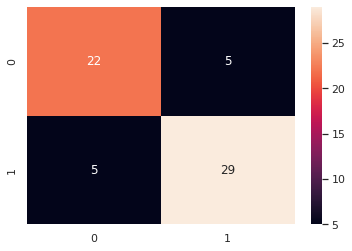

In [111]:
sns.heatmap(confusion_matrix(pred_MNB, y_test), annot = True)

In [112]:
fpr, tpr, thresholds = roc_curve(pred_MNB, y_test)

In [113]:
auc(fpr, tpr)

0.8338779956427016

### K Neighbors Classifier

In [114]:
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
pred_KNC = KNC.predict(x_test)

In [115]:
print(classification_report(pred_KNC, y_test))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        27
           1       0.74      0.74      0.74        34

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



<AxesSubplot:>

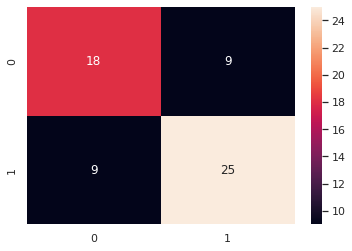

In [116]:
sns.heatmap(confusion_matrix(pred_KNC, y_test), annot = True)

In [117]:
fpr, tpr, thresholds = roc_curve(pred_KNC, y_test)

In [118]:
auc(fpr, tpr)

0.7009803921568628

### Support Vector Machine Classifier

In [119]:
SVC = SVC()
SVC.fit(x_train, y_train)
pred_SVC = SVC.predict(x_test)

In [120]:
print(classification_report(pred_SVC, y_test))

              precision    recall  f1-score   support

           0       0.56      0.79      0.65        19
           1       0.88      0.71      0.79        42

    accuracy                           0.74        61
   macro avg       0.72      0.75      0.72        61
weighted avg       0.78      0.74      0.75        61



<AxesSubplot:>

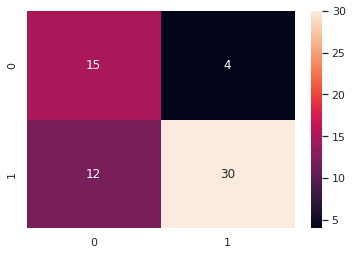

In [121]:
sns.heatmap(confusion_matrix(pred_SVC, y_test), annot = True)

In [122]:
fpr, tpr, thresholds = roc_curve(pred_SVC, y_test)

In [123]:
auc(fpr, tpr)

0.7518796992481204

### Decision Tree Classifier

In [124]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred_DTC = DTC.predict(x_test)

In [125]:
print(classification_report(pred_DTC, y_test))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        24
           1       0.79      0.73      0.76        37

    accuracy                           0.72        61
   macro avg       0.71      0.72      0.71        61
weighted avg       0.73      0.72      0.72        61



<AxesSubplot:>

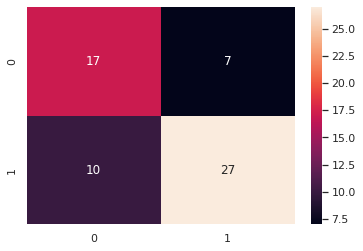

In [126]:
sns.heatmap(confusion_matrix(pred_DTC, y_test), annot = True)

In [127]:
fpr, tpr, thresholds = roc_curve(pred_DTC, y_test)

In [128]:
auc(fpr, tpr)

0.7190315315315315

### Random Forest Classifier¶

In [129]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred_RFC = RFC.predict(x_test)

In [130]:
print(classification_report(pred_RFC, y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



<AxesSubplot:>

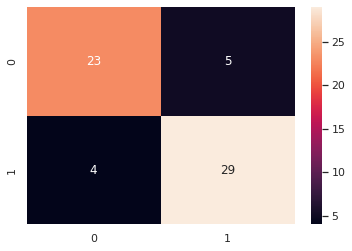

In [131]:
sns.heatmap(confusion_matrix(pred_RFC, y_test), annot = True)

In [132]:
fpr, tpr, thresholds = roc_curve(pred_RFC, y_test)

In [133]:
auc(fpr, tpr)

0.8501082251082251

### Gradient Boosting Classifier

In [134]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
pred_GBC = GBC.predict(x_test)

In [135]:
print(classification_report(pred_GBC, y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



<AxesSubplot:>

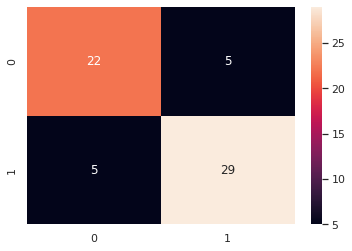

In [136]:
sns.heatmap(confusion_matrix(pred_GBC, y_test), annot = True)

In [137]:
fpr, tpr, thresholds = roc_curve(pred_GBC, y_test)

In [138]:
auc(fpr, tpr)

0.8338779956427016

### Extreme Gradient Boosting Classifier

In [139]:
XGBC = XGBClassifier()
XGBC.fit(x_train, y_train)
pred_XGBC = XGBC.predict(x_test)

[19:07:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [140]:
print(classification_report(pred_XGBC, y_test))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



<AxesSubplot:>

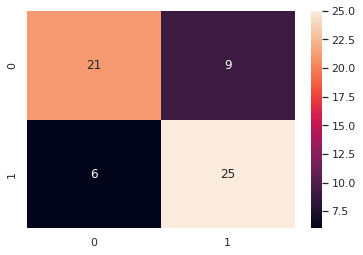

In [141]:
sns.heatmap(confusion_matrix(pred_XGBC, y_test), annot = True)

In [142]:
fpr, tpr, thresholds = roc_curve(pred_XGBC, y_test)

In [143]:
auc(fpr, tpr)

0.7532258064516129